In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [2]:
# load the dataset
data=loadmat("ex8data1.mat")
#data
X=data['X']
Xval=data['Xval']
yval=data["yval"]

In [4]:
X.shape

(307, 2)

In [5]:
Xval.shape,yval.shape

((307, 2), (307, 1))

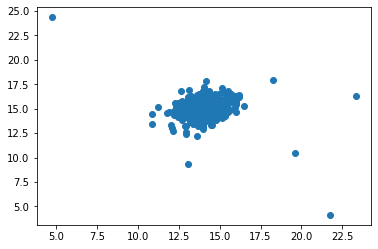

In [6]:
#plot scatter plot
plt.scatter(X[:,0],X[:,1])

In [7]:
# Gaussian distribution- mean & variance
mu=X.mean(axis=0)
sigma=X.var(axis=0)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [8]:
X

array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944],
       [13.92240251, 13.40646894],
       [12.82213164, 14.22318782],
       [15.67636615, 15.89169137],
       [16.16287532, 16.20299807],
       [12.66645095, 14.89908374],
       [13.98454962, 12.95800822],
       [14.06146043, 14.54908874],
       [13.38988671, 15.56202142],
       [13.39350475, 15.62698794],
       [13.97900926, 13.28061494],
       [14.16791259, 14.46583829],
       [13.96176145, 14.75182421],
       [14.45899735, 15.07018563],
       [14.58476372, 15.82743424],
       [12.07427074, 13.0671109 ],
       [13.5491294 , 15.53827677],
       [13.98625042, 14.78776304],
       [14.96991942, 16.51830493],
       [14.25576597, 15.29427277],
       [15.33425   , 16.12469989],
       [15.6350487 , 16.49094477],
       [13.62081292, 15.45947525],
       [14.81548485, 15.33956527],
       [14.59318973,

In [10]:
from scipy import stats
p=np.zeros([X.shape[0],X.shape[1]]) # all 307 values intialized to zeros by taking new array p.
p[:,0]=stats.norm(mu[0],sigma[0]).pdf(X[:,0])
p[:,1]=stats.norm(mu[1],sigma[1]).pdf(X[:,1])
p.shape

(307, 2)

In [11]:
# let us find for Xval
pval=np.zeros([Xval.shape[0],Xval.shape[1]])
pval[:,0]=stats.norm(mu[0],sigma[0]).pdf(Xval[:,0])
pval[:,1]=stats.norm(mu[1],sigma[1]).pdf(Xval[:,1])
pval

array([[1.43145828e-01, 2.33099744e-01],
       [2.10568645e-01, 2.28970091e-01],
       [2.00036472e-01, 1.60735873e-01],
       [2.08853043e-01, 1.96083672e-01],
       [2.04489256e-01, 2.17659734e-01],
       [1.77964529e-01, 1.86655272e-01],
       [1.75770502e-01, 2.32086044e-01],
       [2.16205340e-01, 2.25937306e-01],
       [1.06508589e-01, 2.14988958e-01],
       [2.00329800e-01, 2.32958761e-01],
       [2.10431542e-01, 2.25881255e-01],
       [1.45319667e-01, 2.32600626e-01],
       [1.81221860e-01, 2.08402918e-01],
       [1.19538566e-01, 1.52969229e-01],
       [2.02530856e-01, 1.87774681e-01],
       [1.72564369e-01, 1.97158002e-01],
       [1.63740053e-01, 2.07468747e-01],
       [1.71017563e-01, 2.31536482e-01],
       [2.14902672e-01, 2.14658938e-01],
       [1.71437675e-01, 2.02859757e-01],
       [2.17688225e-01, 2.29321733e-01],
       [1.70044744e-01, 1.74719352e-01],
       [2.10606701e-01, 2.33334293e-01],
       [2.16610196e-01, 2.06281088e-01],
       [2.062938

In [13]:
# find the threshold
def select_threshold(pval,yval):
    best_epsilon=0
    best_f1=0
    f1=0
    step=(pval.max()-pval.min())/1000
    for epsilon in np.arange(pval.min(),pval.max(),step):
        preds=pval<epsilon
        tp=np.sum(np.logical_and(preds==1,yval==1)).astype(float)
        fp=np.sum(np.logical_and(preds==1,yval==0)).astype(float)
        fn=np.sum(np.logical_and(preds==0,yval==1)).astype(float)
        
        
        precision = tp/(tp+fp)
        recall    = tp/(tp+fn)
        f1        = (2*precision*recall)/(precision+recall)
        
        if f1>best_f1:
            best_f1=f1
            best_epsilon=epsilon
    return best_epsilon,best_f1
epsilon,f1=select_threshold(pval,yval)

epsilon,f1

<ipython-input-13-a264cfdacb12>:14: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp/(tp+fp)


(0.009566706005956842, 0.7142857142857143)

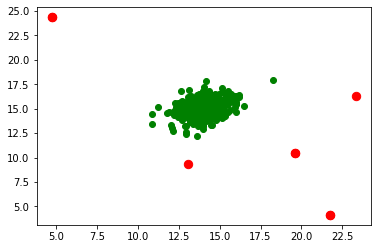

In [15]:
#find outier
outliers=np.where(p<epsilon)
plt.scatter(X[:,0],X[:,1],color='g')
plt.scatter(X[outliers[0],0],X[outliers[0],1],color='r',s=70)

## end of program